In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

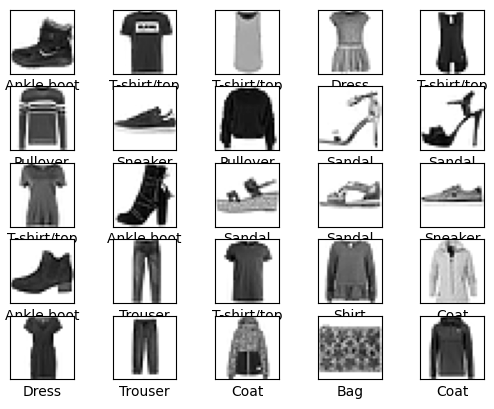

In [ ]:
# plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))


# varied filter sizes and number of filters and structure of pooling

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 [==============================] - 50s 26ms/step - loss: 0.6601 - accuracy: 0.7519 - val_loss: 0.5448 - val_accuracy: 0.7915
Epoch 2/3
1875/1875 [==============================] - 44s 24ms/step - loss: 0.4489 - accuracy: 0.8356 - val_loss: 0.4271 - val_accuracy: 0.8413
Epoch 3/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3912 - accuracy: 0.8559 - val_loss: 0.4078 - val_accuracy: 0.8519


In [ ]:
# tf.keras.utils.plot_model(model,  show_shapes=True)

In [ ]:
model.summary()

In [ ]:
# Define the CNN model
def create_cnn(learning_rate=0.001, dropout_rate=0.2):
    model_2 = models.Sequential()
    model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_2.add(layers.MaxPooling2D((2, 2)))
    model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_2.add(layers.Flatten())
    model_2.add(layers.Dense(128, activation='relu'))
    model_2.add(layers.Dropout(dropout_rate))
    model_2.add(layers.Dense(10))

    # Compile the model with custom learning rate
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
dropout_rates = [0.2, 0.4, 0.6]

for lr in learning_rates:
    for batch_size in batch_sizes:
        for dropout_rate in dropout_rates:
            # Create the model with the current set of hyperparameters
            model = create_cnn(learning_rate=lr, dropout_rate=dropout_rate)

            # Train the model
            history = model.fit(train_images, train_labels, epochs=2, batch_size=batch_size, validation_data=(test_images, test_labels))

            # Evaluate and print the accuracy
            test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
            print(f'Learning Rate: {lr}, Batch Size: {batch_size}, Dropout Rate: {dropout_rate}, Test Accuracy: {test_acc}')


Epoch 1/2
1875/1875 [==============================] - 50s 25ms/step - loss: 0.4574 - accuracy: 0.8297 - val_loss: 0.4693 - val_accuracy: 0.8299
Epoch 2/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4239 - accuracy: 0.8403 - val_loss: 0.4313 - val_accuracy: 0.8417
313/313 - 3s - loss: 0.4313 - accuracy: 0.8417 - 3s/epoch - 8ms/step
Learning Rate: 0.001, Batch Size: 32, Dropout Rate: 0.2, Test Accuracy: 0.84170001745224
Epoch 1/2
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3987 - accuracy: 0.8512 - val_loss: 0.4232 - val_accuracy: 0.8401
Epoch 2/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3789 - accuracy: 0.8605 - val_loss: 0.4608 - val_accuracy: 0.8177
313/313 - 2s - loss: 0.4608 - accuracy: 0.8177 - 2s/epoch - 7ms/step
Learning Rate: 0.001, Batch Size: 32, Dropout Rate: 0.4, Test Accuracy: 0.8177000284194946
Epoch 1/2
1875/1875 [==============================] - 43s 22ms/step - loss: 0.3637 - accuracy: 0.8655

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a CNN model
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(10))

# Compile the model
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    horizontal_flip=True    # Flip images horizontally
)

# Fit the model with augmented data
history = model_3.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=3,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy with data augmentation: {test_acc}')

# Plot training history
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Epoch 1/3
1875/1875 [==============================] - 121s 63ms/step - loss: 0.6556 - accuracy: 0.7537 - val_loss: 0.4551 - val_accuracy: 0.8309
Epoch 2/3
1875/1875 [==============================] - 119s 64ms/step - loss: 0.4751 - accuracy: 0.8214 - val_loss: 0.4181 - val_accuracy: 0.8499
Epoch 3/3
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4183 - accuracy: 0.8444 - val_loss: 0.3618 - val_accuracy: 0.8652
313/313 - 5s - loss: 0.3618 - accuracy: 0.8652 - 5s/epoch - 17ms/step
Test accuracy with data augmentation: 0.8651999831199646
